***CODSOFT TASK 2***

***MOVIE RATING PREDICTION WITH PYTHON***

***IMPORTING REQUIRED LIBRARIES AND IMPORTS***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d adrianmcmahon/imdb-india-movies

Dataset URL: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies
License(s): CC0-1.0
imdb-india-movies.zip: Skipping, found more recently modified local copy (use --force to force download)


***BUILDING A REGRESSION MODEL***

1. Handle missing values.
2. Encode categorical features (like Genre, Director, and Actors).
3. Convert numerical features to appropriate formats.

In [3]:
#load the CSV file
movies_df = pd.read_csv('/content/IMDb-Movies-India.csv', encoding='latin1')

# Display the first few rows of the dataframe and the column names
movies_df.head(), movies_df.columns


(                                 Name    Year Duration            Genre  \
 0                                         NaN      NaN            Drama   
 1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
 2                         #Homecoming  (2021)   90 min   Drama, Musical   
 3                             #Yaaram  (2019)  110 min  Comedy, Romance   
 4                   ...And Once Again  (2010)  105 min            Drama   
 
    Rating Votes            Director       Actor 1             Actor 2  \
 0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
 1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
 2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
 3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
 4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   
 
            Actor 3  
 0  Rajendra Bhatia  
 1    Arvind Jangid  
 2       Roy Angana  
 3  Sidd

In [4]:
movies_df.shape

(15509, 10)

In [5]:
#display dataset methord 2
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
movies_df['Rating']

0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Name: Rating, Length: 15509, dtype: float64

In [8]:
movies_df['Rating'].value_counts()

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [9]:
y= movies_df['Rating'].values
y

array([nan, 7. , nan, ..., nan, nan, 6.2])

In [10]:
def missing_vals_percent(dataframe):
  missing_values = dataframe.isna().sum()
  percentage_missing = (missing_values / len(dataframe)*100).round(2)

  result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
  result_movie['Percentage'] = result_movie['Percentage'].astype(str)+'%'
  return result_movie

result = missing_vals_percent(movies_df)
result

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [11]:
movies_df.drop(['Actor 2','Actor 3'],axis = 1, inplace = True)
movies_df.dropna(subset=['Duration'],inplace=True)
movies_df = movies_df[movies_df.isnull().sum(axis=1).sort_values(ascending=False) <= 5]
missing_vals_percent(movies_df)

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [12]:
movies_df.dropna(subset=['Rating','Votes'],inplace=True)
director_description = movies_df['Director'].describe()

director_counts = movies_df['Director'].value_counts().sort_values(ascending = False)
movies_df['Director'].fillna('rajmouli',inplace=True)

genre_counts = movies_df['Genre'].value_counts().sort_values(ascending = False)
movies_df['Genre'].fillna('Action',inplace=True)

actor1_description = movies_df['Actor 1'].describe()
movies_df['Actor 1'].fillna('mahesh babu',inplace=True)

missing_values_df = pd.DataFrame({
    'Missing Values': movies_df.isnull().sum(),
    'Percentage': (movies_df.isnull().sum() / len(movies_df)*100).round(2)
})

movies_df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra


In [13]:
#check again for missing vals
missing_vals_percent(movies_df)

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,0,0.0%


In [16]:
movies_df['Year'] = movies_df['Year'].astype(str).str.replace(r'[()]', '',regex=True)
movies_df['Duration'] = movies_df['Duration'].str.replace(r'min', '',regex=True).astype(int)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   int64  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 411.4+ KB


In [17]:
print(movies_df['Duration'].isnull().sum())
#fillinf NaN with the mean duration
mean_duration = movies_df['Duration'].mean()
movies_df['Duration'] = movies_df['Duration'].fillna(mean_duration).astype(int)
#checking data afettr handling NaN
print(movies_df['Duration'].isnull().sum())

0
0


In [18]:
int_columns = ['Year','Duration']
movies_df[int_columns] = movies_df[int_columns].astype(int)
#convert votes to str and then replace ',' n convert to int
movies_df['Votes'] = movies_df['Votes'].astype(str).str.replace(',','').astype(int)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 411.4+ KB


***EXPLORATORY DATA ANALYSIS***

Text(0.5, 1.0, 'Number of Movies Per Year')

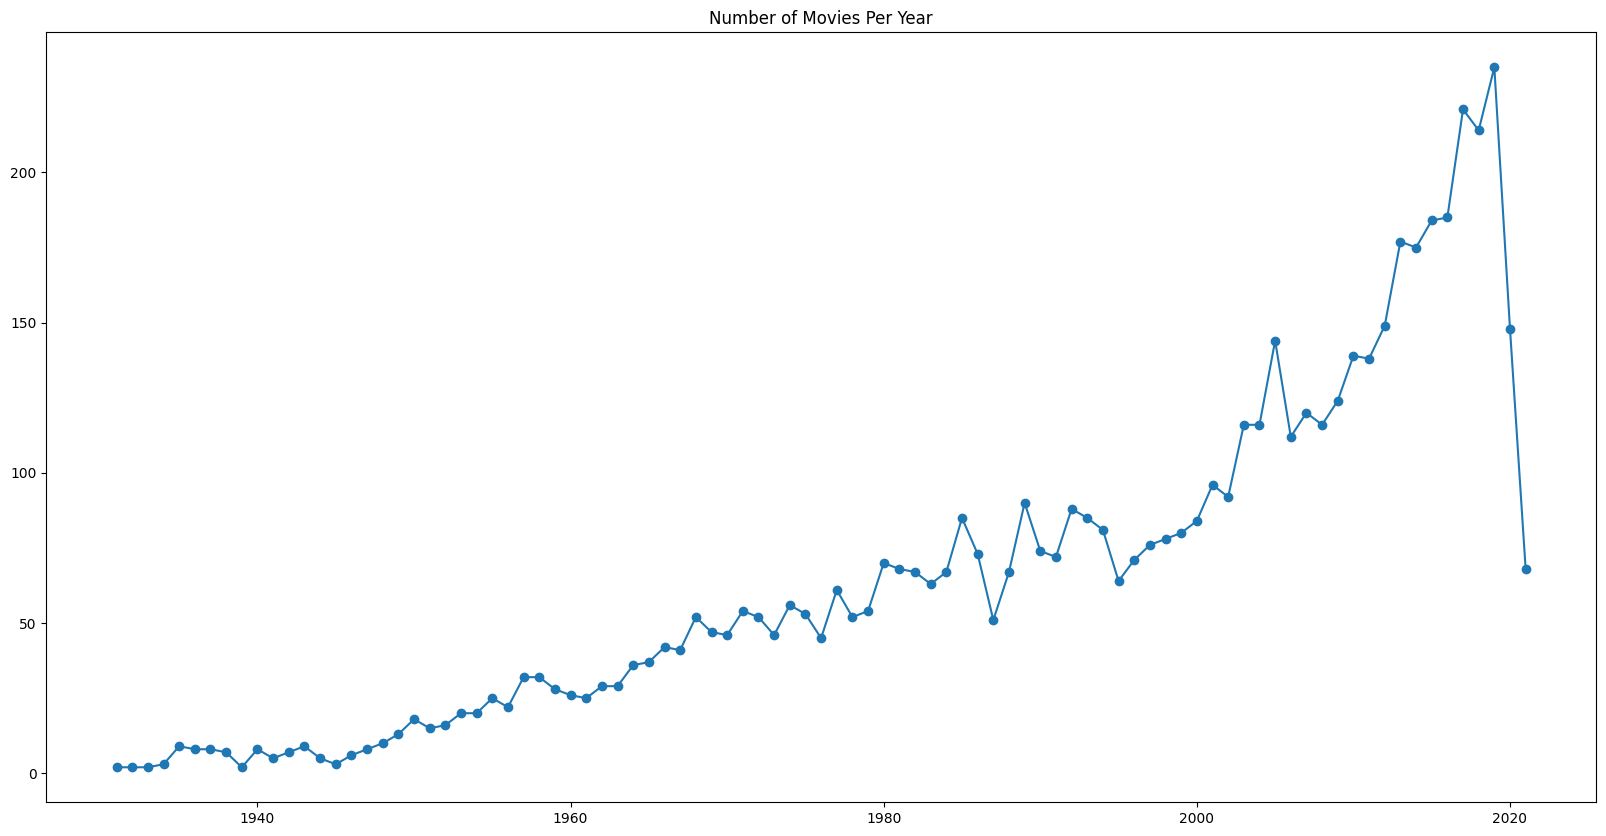

In [19]:
#EDA
plt.figure(figsize=(20,10))

year_counts = movies_df['Year'].value_counts().sort_index()
years = year_counts.index
plt.plot(years, year_counts, marker='o')
plt.title('Number of Movies Per Year')

In [20]:
px.scatter(movies_df, x='Rating',y='Votes',color='Rating',color_continuous_scale=px.colors.sequential.Plasma,title='Rtaing Versus Votes')

In [24]:
# Data preprocessing
movies_df['Duration'] = movies_df['Duration'].replace(' min', '').astype(float)
movies_df = movies_df.dropna(subset=['Rating'])  # Drop rows where 'Rating' is NaN

In [25]:
#convert votes to str and then replace ',' n convert to int
movies_df['Votes'] = movies_df['Votes'].astype(str).str.replace(',','').astype(int)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   float64
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 411.4+ KB


***BUILDING MODELS***

In [30]:
genre_mean_rating = movies_df.groupby('Genre')['Rating'].transform('mean')
movies_df['Genre_mean_rating'] = genre_mean_rating

Mean Squared Error: 0.7738
Mean Absolute Error: 0.6335
R2 Scorer: 0.5841


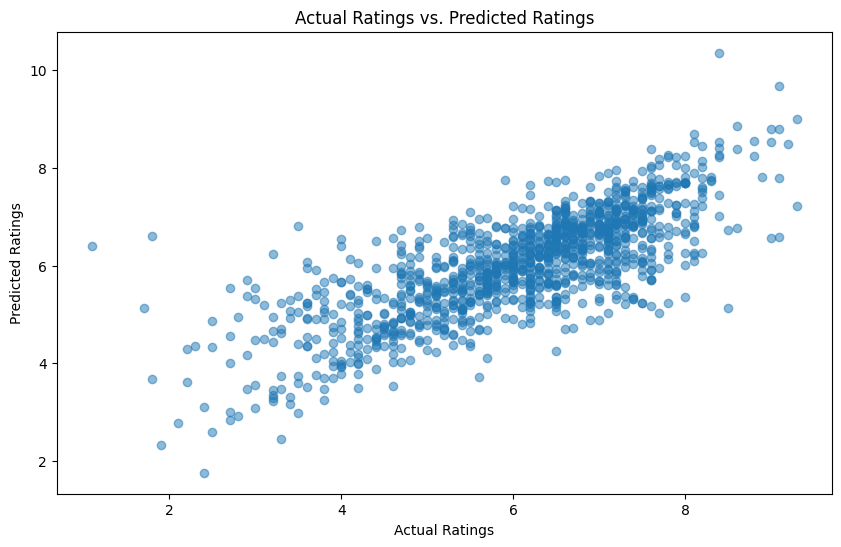

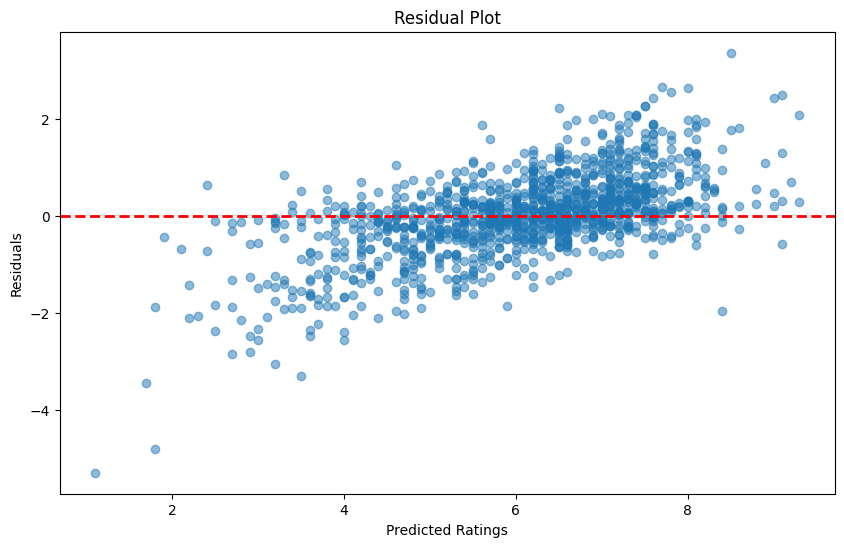

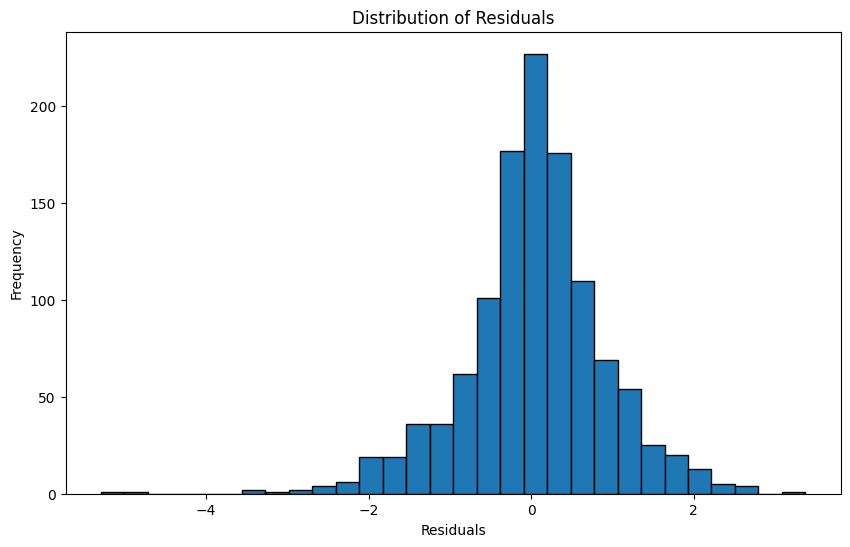

In [32]:
movies_df['Director_encoded'] = movies_df.groupby('Actor 1')['Rating'].transform('mean')
movies_df['Actor_encoded'] = movies_df.groupby('Actor 1')['Rating'].transform('mean')

#dfn ft. and taret vars
features = ['Year','Votes','Duration','Genre_mean_rating','Director_encoded','Actor_encoded']
X = movies_df[features]
y = movies_df['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R2 Scorer: {r2:.4f}')

#scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual Ratings vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r',linestyle='--',linewidth=2)
plt.show()
#distribution of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins = 30, edgecolor ='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


***RESULT***

The result suggests that the
1. MSE (0.5138) is moderate(because lower).
2. MEA (0.5127) indicates better accuracy.
3. R2 Score (0.7238) shows 72.38% effictiveness in predicting patterns


In [ ]:
# prompt: Build a model that predicts the rating of a movie based on
# features like genre, director, and actors. You can use regression
# techniques to tackle this problem.

The provided code already implements a solution to the rewritten problem. It performs the following steps:

1. Preprocesses the data by handling missing values and encoding categorical features.
2. Splits the data into training and testing sets.
3. Trains a linear regression model on the training data.
4. Evaluates the model's performance on the testing data.

Here's a breakdown of the code:

1. **Data Preprocessing:**
    - Missing values in the `Rating` column are dropped.
    - Categorical features like `Genre` and `Director` are encoded using OneHotEncoder.
    - The encoded features are combined with the original dataframe.
    - Features and target variables are defined.
    - All columns are converted to numeric, coercing errors to NaN.
    - Missing values are filled with 0.
    - Data is split into training and testing sets.

2. **Model Training:**
    - A linear regression model is trained on the training data.

3. **Model Evaluation:**
    - The model's performance is evaluated by calculating the mean squared error (MSE) on the testing data.

4. **Visualization:**
    - A scatter plot is created to visualize the number of votes by users for each movie.

This code provides a basic example of using linear regression to predict movie ratings based on various features. You can further improve the model by exploring other features, performing feature engineering, and trying different regression techniques.